In [1]:
import vaex as vx
import vaex.ml
import vaex.ml.sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data with Pandas

In [2]:
df_pandas = pd.read_csv('1. Data for the task 1.csv')

## Check for NaNs

In [3]:
df_pandas[df_pandas.isna().any(axis=1)] #No NaNs found

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS


## Replace slightly different values ('N ' with 'N')
- Some values have an extra space, removed the space in these so we only have the correct number of categories for CLASS and Gender

In [4]:
where_f = np.where(df_pandas['Gender'] == 'f')
where_N = np.where(df_pandas['CLASS'] == 'N ')
where_Y = np.where(df_pandas['CLASS'] == 'Y ') 
print(df_pandas['Gender'][where_f[0][0]])             
print(df_pandas['CLASS'][where_N[0][0]])
print(df_pandas['CLASS'][where_Y[0][0]])


f
N 
Y 


In [5]:
df_pandas['Gender'][where_f[0][0]] = 'F'
df_pandas['CLASS'][where_N[0][0]] = 'N'
for i in where_Y[0]:
    df_pandas['CLASS'][i] = 'Y'

<ipython-input-5-b38115120642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandas['Gender'][where_f[0][0]] = 'F'
<ipython-input-5-b38115120642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandas['CLASS'][where_N[0][0]] = 'N'
<ipython-input-5-b38115120642>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandas['CLASS'][i] = 'Y'


In [6]:
print(np.where(df_pandas['Gender'] == 'f'))
print(np.where(df_pandas['CLASS'] == 'N '))
print(np.where(df_pandas['CLASS'] == 'Y '))


(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


## Pandas Dataframe to Vaex Dataframe for specific methods in Vaex

In [7]:
#Move over to Vaex dataframe
df = vx.from_pandas(df_pandas)

In [8]:
df

#,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


## Encode Categorical Variables to Numbers

In [9]:
label_encoder = vaex.ml.LabelEncoder(features=['Gender', 'CLASS'])
df = label_encoder.fit_transform(df)
df.head(10)

#,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,label_encoded_Gender,label_encoded_CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N,1,1
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23,N,0,1
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N,1,1
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N,1,1
4,504,34223,M,33,7.1,46,4.9,4.9,1,0.8,2,0.4,21,N,0,1
5,634,34224,F,45,2.3,24,4,2.9,1,1,1.5,0.4,21,N,1,1
6,721,34225,F,50,2,50,4,3.6,1.3,0.9,2.1,0.6,24,N,1,1
7,421,34227,M,48,4.7,47,4,2.9,0.8,0.9,1.6,0.4,24,N,0,1
8,670,34229,M,43,2.6,67,4,3.8,0.9,2.4,3.7,1,21,N,0,1
9,759,34230,F,32,3.6,28,4,3.8,2,2.4,3.8,1,24,N,1,1


## View Data Distributions

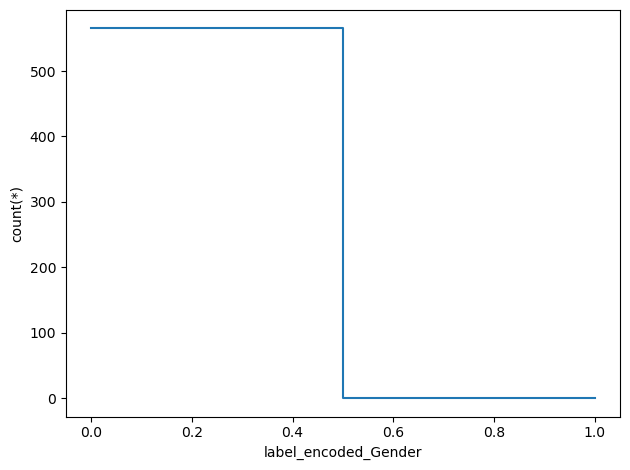

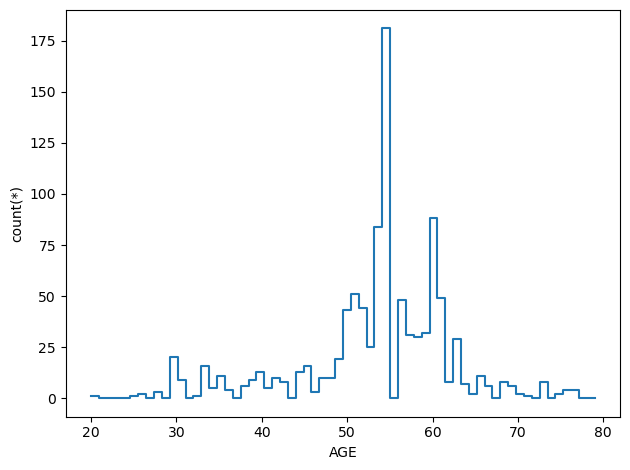

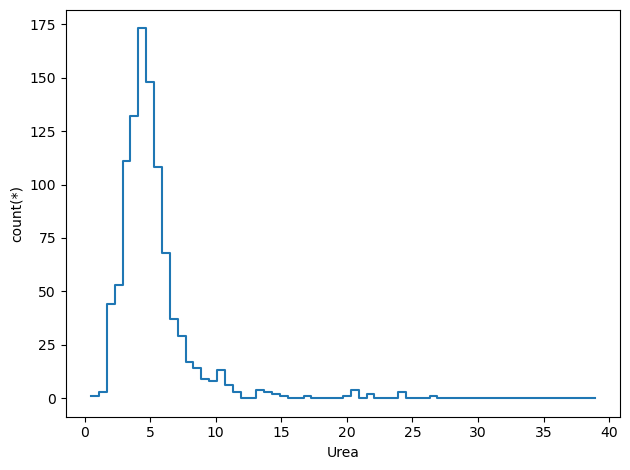

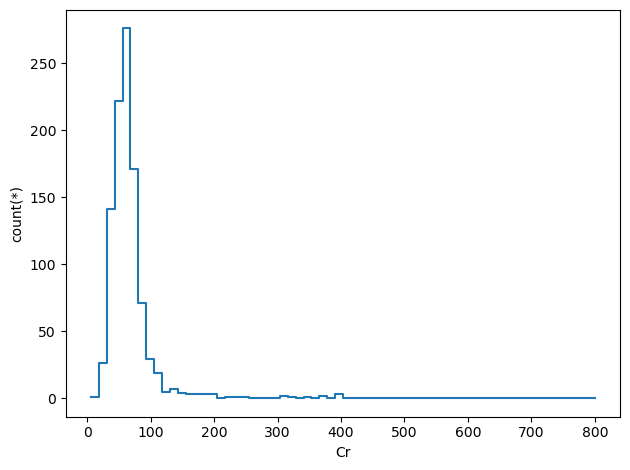

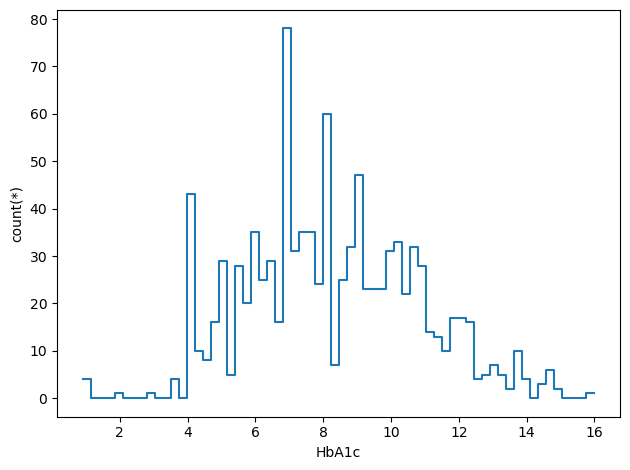

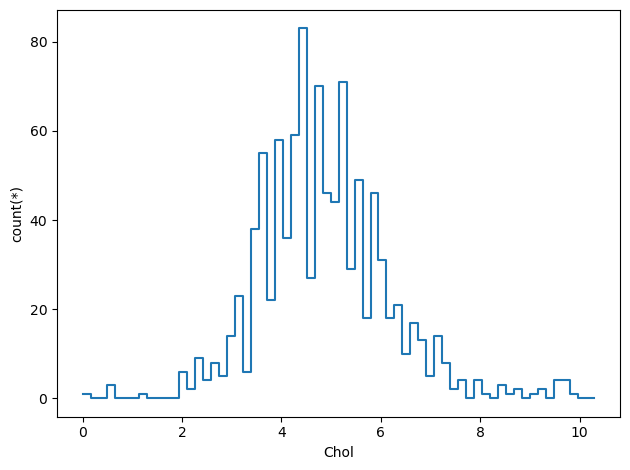

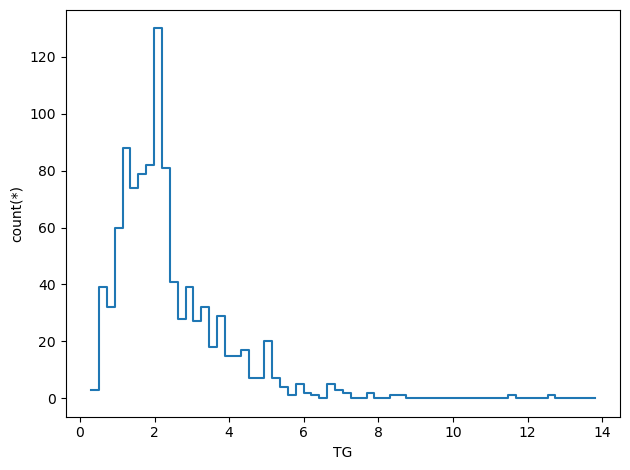

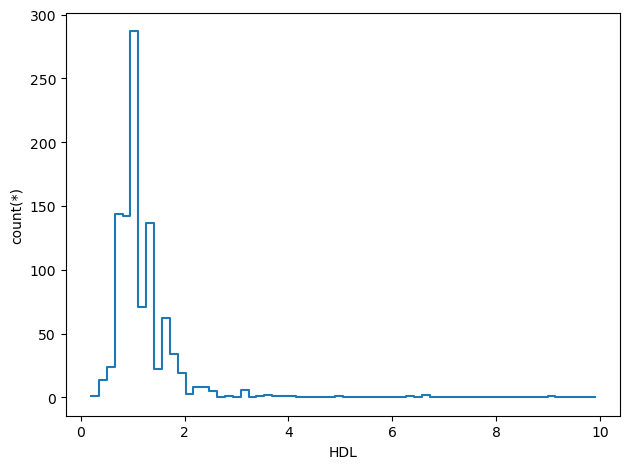

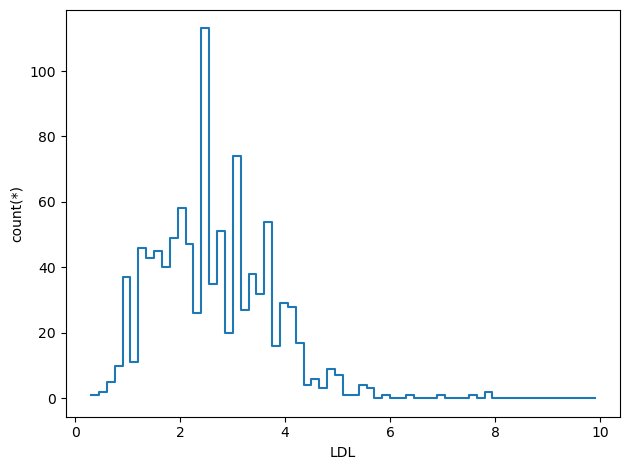

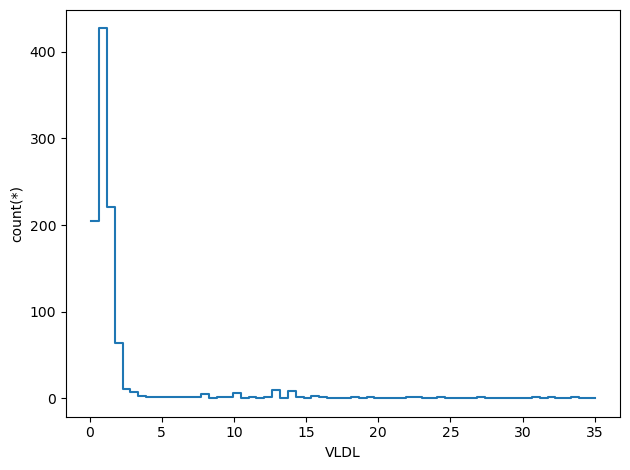

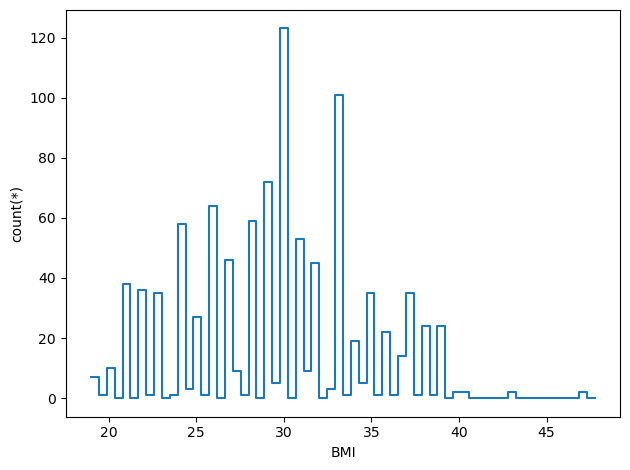

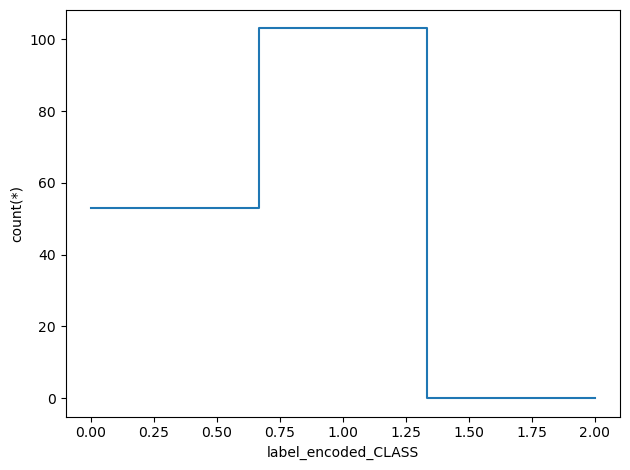

In [10]:
df.viz.histogram(df.label_encoded_Gender, shape=2)
plt.show()

df.viz.histogram(df.AGE)
plt.show()

df.viz.histogram(df.Urea)
plt.show()

df.viz.histogram(df.Cr)
plt.show()

df.viz.histogram(df.HbA1c)
plt.show()

df.viz.histogram(df.Chol)
plt.show()

df.viz.histogram(df.TG)
plt.show()

df.viz.histogram(df.HDL)
plt.show()

df.viz.histogram(df.LDL)
plt.show()

df.viz.histogram(df.VLDL)
plt.show()

df.viz.histogram(df.BMI)
plt.show()

df.viz.histogram(df.label_encoded_CLASS, shape=3)
plt.show()

### Not sure why the last histogram is showing 0 counts for value 2 but double checking below to get an idea of what is in the data

In [11]:
x = df.selection = df.label_encoded_CLASS == 2
df[x]

#,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,label_encoded_Gender,label_encoded_CLASS
0,12,23975,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,0,2
1,18,23977,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,0,2
2,24,23979,M,45,4.1,63,10.2,4.8,1.3,0.9,3.3,9.5,34.3,Y,0,2
3,675,33656789,M,45,4.1,63,10.2,4.8,1.3,0.9,3.3,9.5,34.3,Y,0,2
4,39,23984,M,45,5.3,77,11.2,3.9,1.5,1.3,2.0,10.4,29.5,Y,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,0,2
840,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,0,2
841,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,0,2
842,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,0,2


## Shuffle Data

In [12]:
df = df.shuffle(random_state=10)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Back to Pandas to use sklearn Random Forest Classifier
- Highly accurate, robust method because of the number of decision trees
- Won't overfit
- Can get relative feature importance
- Can be slow but shouldn't be an issue with this dataset

In [14]:
df_pandas = df.to_pandas_df()

## Selecting Features (X) and Labels (y)

In [15]:
X = df_pandas[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'label_encoded_Gender']]
y = df_pandas['label_encoded_CLASS']

## Split Data into Training and Test sets (80/20)
- Want to try and use more of the data to train since only have about 1000 rows

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## View Test and Training set distributions

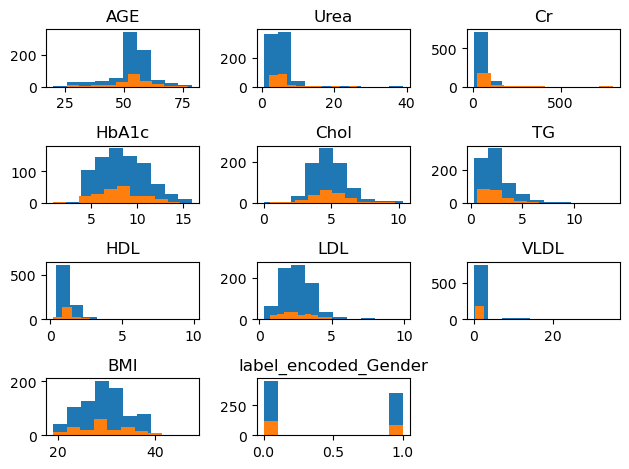

In [17]:
fig = plt.figure()
Age = fig.add_subplot(431)
Age.hist(X_train['AGE'])
Age.hist(X_test['AGE'])
Age.set_title('AGE')

Urea = fig.add_subplot(432)
Urea.hist(X_train['Urea'])
Urea.hist(X_test['Urea'])
Urea.set_title('Urea')

Cr = fig.add_subplot(433)
Cr.hist(X_train['Cr'])
Cr.hist(X_test['Cr'])
Cr.set_title('Cr')

HbA1c = fig.add_subplot(434)
HbA1c.hist(X_train['HbA1c'])
HbA1c.hist(X_test['HbA1c'])
HbA1c.set_title('HbA1c')

Chol = fig.add_subplot(435)
Chol.hist(X_train['Chol'])
Chol.hist(X_test['Chol'])
Chol.set_title('Chol')

TG = fig.add_subplot(436)
TG.hist(X_train['TG'])
TG.hist(X_test['TG'])
TG.set_title('TG')

HDL = fig.add_subplot(437)
HDL.hist(X_train['HDL'])
HDL.hist(X_test['HDL'])
HDL.set_title('HDL')

LDL = fig.add_subplot(438)
LDL.hist(X_train['LDL'])
LDL.hist(X_test['LDL'])
LDL.set_title('LDL')

VLDL = fig.add_subplot(439)
VLDL.hist(X_train['VLDL'])
VLDL.hist(X_test['VLDL'])
VLDL.set_title('VLDL')

BMI = fig.add_subplot(4,3,10)
BMI.hist(X_train['BMI'])
BMI.hist(X_test['BMI'])
BMI.set_title('BMI')

Gender = fig.add_subplot(4,3,11)
Gender.hist(X_train['label_encoded_Gender'])
Gender.hist(X_test['label_encoded_Gender'])
Gender.set_title('label_encoded_Gender')

plt.tight_layout()
plt.show()

## Create RFC
- Fit model with training data
- predict answers for training set
- check accuracy

In [38]:
clf = RandomForestClassifier(n_estimators = 12)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99


In [39]:
#Feature Importance
feature_imp = pd.Series(clf.feature_importances_, index=['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'label_encoded_Gender']).sort_values(ascending=False)
feature_imp

HbA1c                   0.351711
BMI                     0.312584
Chol                    0.085929
AGE                     0.070987
VLDL                    0.055279
LDL                     0.031495
Cr                      0.028619
TG                      0.021100
HDL                     0.020948
Urea                    0.019347
label_encoded_Gender    0.002001
dtype: float64

## Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 13   0   1]
 [  0  20   0]
 [  0   1 165]]


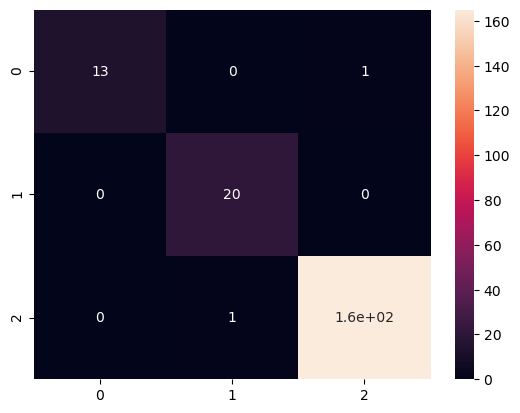

In [45]:
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat, annot = True)
plt.show()